Introduction to SPGCI

https://pypi.org/project/spgci/

In [1]:
import spgci as ci
from datetime import date

ci.set_credentials("filipe.gomes@galp.com", "Ee?.nY.Bvgi-k4*")
mdd = ci.MarketData()

symbols = ["PCAAS00", "PCAAT00"]

mdd.get_assessments_by_symbol_historical(symbol=symbols, bate="c", assess_date_gte=date(2025,1,1))

,bate,value,assessDate,isCorrected,modDate,symbol
0,c,76.530,2025-01-02,N,2025-01-02 19:39:38,PCAAS00
1,c,76.760,2025-01-03,N,2025-01-03 18:29:01,PCAAS00
2,c,77.570,2025-01-06,N,2025-01-06 20:48:39,PCAAS00
3,c,77.890,2025-01-07,N,2025-01-07 19:55:43,PCAAS00
4,c,77.235,2025-01-08,N,2025-01-08 19:18:12,PCAAS00
...,...,...,...,...,...,...
97,c,71.405,2025-03-10,N,2025-03-10 08:43:30,PCAAT00
98,c,70.510,2025-03-11,N,2025-03-11 09:04:43,PCAAT00
99,c,70.650,2025-03-12,N,2025-03-12 08:43:48,PCAAT00
100,c,72.060,2025-03-13,N,2025-03-13 08:39:29,PCAAT00


In [2]:
wrd = ci.WorldRefineryData()

wrd.get_yields(year=2020, owner="BP")
# DataFrame of yields for the year "2020" where "BP" is the refinery owner.

ref = wrd.get_reference_data(type=wrd.RefTypes.Refineries)
# DataFrame of all refineries.

ref

C:\Users\filip\anaconda3\envs\Oil_Analytics\Lib\site-packages\spgci\api_client.py:181: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df: DataFrame = pd.concat(objs=[df, new_df], ignore_index=True)  # type: ignore
Fetching...: 100%|███████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.48it/s]


,Id,Latitude,Longitude,Name,PADD,City.CityCode,City.StateCode,City.Name,Country.Id,Country.Name,State.Id,State.Name,Region.Id,Region.Name,Configuration.Id,Configuration.Name,Operator.Id,Operator.Name,PADD.Id,PADD.Name
0,1,40.604958,19.756971,Albania | Ballsh | Albpetrol Albanian State Co,NaN,1,-1,Ballsh,1,Albania,-1,Not applicable,6,East Europe,2,Coking,19,Albpetrol Albanian State Co,NaN,NaN
1,3,40.708528,19.549707,Albania | Fieri | Albpetrol Albanian State Co,NaN,3,-1,Fieri,1,Albania,-1,Not applicable,6,East Europe,8,Topping,19,Albpetrol Albanian State Co,NaN,NaN
2,5,35.809656,-0.259589,Algeria | Arzew | Enterprise National De Raff ...,NaN,6,-1,Arzew,2,Algeria,-1,Not applicable,1,Africa,5,Hydroskimming,269,Enterprise National De Raff,NaN,NaN
3,8,36.736422,3.125781,Algeria | Algiers | Enterprise National De Raf...,NaN,5,-1,Algiers,2,Algeria,-1,Not applicable,1,Africa,4,Cracking,269,Enterprise National De Raff,NaN,NaN
4,9,31.792197,6.056817,Algeria | Hassi Messaoud | Enterprise National...,NaN,8,-1,Hassi Messaoud,2,Algeria,-1,Not applicable,1,Africa,5,Hydroskimming,269,Enterprise National De Raff,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,2576,NaN,NaN,India | Cauvery Basin | Indian Oil Corp.,None,1849,-1,Cauvery Basin,55,India,-1,Not applicable,13,South Asia,2,Coking,389,Indian Oil Corp.,NaN,NaN
2008,2577,NaN,NaN,Iraq | Erbil | Lanaz,None,1423,-1,Erbil,58,Iraq,-1,Not applicable,11,Middle East,8,Topping,2252,Lanaz,NaN,NaN
2009,2578,NaN,NaN,China | Puyang | Henan Junheng Industry Group ...,None,1666,133,Puyang,23,China,133,Henan,4,China,6,Lubes,2258,Henan Junheng Industry Group Biotechnology Co....,NaN,NaN
2010,2579,NaN,NaN,Brazil | Camaçari | Dax Oil | {Bahia},None,1851,-1,Camaçari,16,Brazil,-1,Not applicable,9,Latin America,8,Topping,2259,Dax Oil,NaN,NaN


In [17]:
ref.columns

Index(['Id', 'Latitude', 'Longitude', 'Name', 'PADD', 'City.CityCode',
       'City.StateCode', 'City.Name', 'Country.Id', 'Country.Name', 'State.Id',
       'State.Name', 'Region.Id', 'Region.Name', 'Configuration.Id',
       'Configuration.Name', 'Operator.Id', 'Operator.Name', 'PADD.Id',
       'PADD.Name'],
      dtype='object')

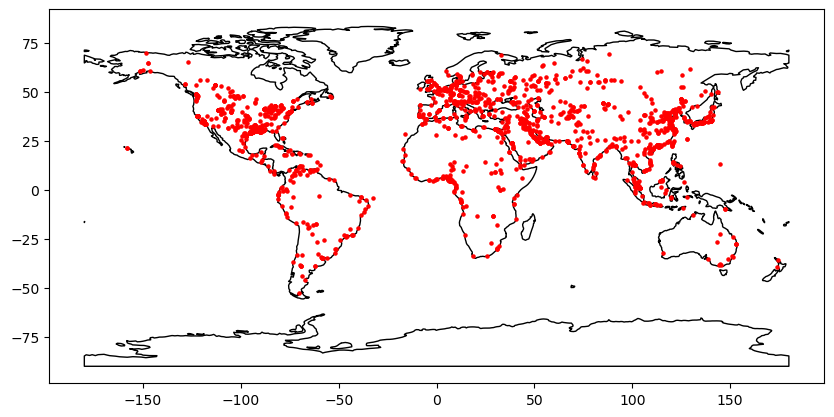

In [5]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import geodatasets

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(ref['Longitude'], ref['Latitude'])]
gdf = GeoDataFrame(ref, geometry=geometry)

# Plot the world map
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='white', edgecolor='black')

# Plot the points
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()


In [56]:
outages_2025 = wrd.get_outages(year=2025, paginate=False)
split_columns = outages_2025['Refinery.Name'].str.split('|', expand=True)
split_columns.columns = ["Country", "City", "Company", "Name"]

outages_2025 = pd.concat([outages_2025, split_columns], axis=1)
outages_2025 = outages_2025.drop(columns=['Refinery.Name'])

outages_2025.tail()

# Drop the original 'Name' column if no longer needed
#outages_2025 = outages_2025.drop(columns=['Name'])

#outages_2025

C:\Users\filip\anaconda3\envs\Oil_Analytics\Lib\site-packages\spgci\api_client.py:148: UserWarning: 
Fetched page [1] of [24]. set `paginate=True` to fetch all pages.
  warnings.warn(


,Year,Quarter,Date,ProcessUnitId,PlanningStatus,OutageId,OwnerPercentShare,OutageVol_MBD,ModifiedDate,Refinery.Id,Refinery.Latitude,Refinery.Longitude,ProcessUnit.Id,ProcessUnit.Name,Owner.Id,Owner.Name,Country,City,Company,Name
995,2025,4,2025-11-06 05:00:00+00:00,1000,Planned,12061,100.00,140.00,2025-02-11 05:00:00+00:00,1551,NaN,NaN,1000,CDU,1222,ChemChina,China,Dongying,Dongying Huaxing Petrochemical Co.,None
996,2025,4,2025-11-06 05:00:00+00:00,1010,Planned,12062,100.00,24.00,2025-02-11 05:00:00+00:00,1551,NaN,NaN,1010,Coker,1222,ChemChina,China,Dongying,Dongying Huaxing Petrochemical Co.,None
997,2025,4,2025-11-06 05:00:00+00:00,1020,Planned,12063,100.00,55.00,2025-02-11 05:00:00+00:00,1551,NaN,NaN,1020,FCU,1222,ChemChina,China,Dongying,Dongying Huaxing Petrochemical Co.,None
998,2025,4,2025-11-06 05:00:00+00:00,1000,Planned,12179,100.00,160.00,2025-01-17 05:00:00+00:00,178,22.748603,113.676844,1000,CDU,827,Sinopec,China,Guangzhou,Guangzhou Tianyu Petrochem. Corp.,None
999,2025,4,2025-11-06 05:00:00+00:00,1000,Planned,12180,57.64,69.17,2025-01-17 05:00:00+00:00,190,31.463531,121.403254,1000,CDU,827,Sinopec,China,Shanghai,Shanghai Petrochemical Co.,None


In [ ]:
az = ref[ref['Name'].str.contains("Al-Zour")]
wrd.get_runs(refinery_id=az["Id"])
# DataFrame of runs for the refineries with "Al-Zour" in the name.

wrd.get_outages(refinery_id=245)
# DataFrame of outages for refineryId 245.

In [16]:
w = ci.Weather()

#w.get_forecast(city="Lisbon")
# DataFrame of forecasts for Boston

#w.get_forecast(market="Europe", weather_date_gte="2025-04-01", weather_date_lte="2025-04-31")
# DateFrame of forecasts in the United States in January 2024.

#w.get_actual(market="Europe", paginate=True)
# DataFrame of actual weather in Hong Kong, paginate=True to get full history.

""
